# 回归算法实现
Created by Vulcan626 on 2023/12/27
本Notebook展示了如何在北京PM2.5数据集上应用线性回归、岭回归和随机森林回归，并对这些模型进行评估和结果可视化。

In [23]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

## 数据加载和预处理

In [24]:
# 加载数据
df = pd.read_csv('BeijingPMData/df_time_fill.csv')
df.head()

,date,No,year,month,day,hour,season,PM_US Post,DEWP,HUMI,...,PRES_bin,Iws_bin,Temp_bin,Pressure_bin,Windspeed_bin,Saturation_bin,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_cv
0,2010-01-01 00:00:00,1,2010,1,1,0,4,129.0,-21.0,43.0,...,"(1013.0, 1024.0]","(-0.135, 117.48]","(-19.061, -3.75]","(1018.5, 1032.25]","(-0.135, 146.737]","(-16.333, 1.0]",0,1,0,0
1,2010-01-01 01:00:00,2,2010,1,1,1,4,129.0,-21.0,47.0,...,"(1013.0, 1024.0]","(-0.135, 117.48]","(-19.061, -3.75]","(1018.5, 1032.25]","(-0.135, 146.737]","(-16.333, 1.0]",0,1,0,0
2,2010-01-01 02:00:00,3,2010,1,1,2,4,129.0,-21.0,43.0,...,"(1013.0, 1024.0]","(-0.135, 117.48]","(-19.061, -3.75]","(1018.5, 1032.25]","(-0.135, 146.737]","(-16.333, 1.0]",0,1,0,0
3,2010-01-01 03:00:00,4,2010,1,1,3,4,129.0,-21.0,55.0,...,"(1013.0, 1024.0]","(-0.135, 117.48]","(-19.061, -3.75]","(1018.5, 1032.25]","(-0.135, 146.737]","(-16.333, 1.0]",0,1,0,0
4,2010-01-01 04:00:00,5,2010,1,1,4,4,129.0,-20.0,51.0,...,"(1013.0, 1024.0]","(-0.135, 117.48]","(-19.061, -3.75]","(1004.75, 1018.5]","(-0.135, 146.737]","(-16.333, 1.0]",0,1,0,0


In [25]:
# 选择回归相关的特征
features = ['DEWP', 'TEMP', 'PRES', 'Iws', 'precipitation', 'Iprec']
target = 'PM_US Post'

In [26]:
# 划分训练集和测试集
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 模型训练和评估

In [31]:
# 线性回归(Linear Regression)
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
# 线性回归报告
print('Linear Regression:')
print('Coefficients: \n', lr.coef_)
print('Intercept: \n', lr.intercept_)
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, lr_pred))
print('Coefficient of determination: %.2f'
        % r2_score(y_test, lr_pred))

# 岭回归(Ridge Regression)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
# 岭回归报告
print('\n Ridge Regression:')
print('Coefficients: \n', ridge.coef_)
print('Intercept: \n', ridge.intercept_)
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, ridge_pred))
print('Coefficient of determination: %.2f'
        % r2_score(y_test, ridge_pred))


# 随机森林回归(Random Forest Regression)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
# 随机森林回归报告
print('\n Random Forest Regression:')
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, rf_pred))
print('Coefficient of determination: %.2f'
        % r2_score(y_test, rf_pred))

# 评估模型
lr_mse = mean_squared_error(y_test, lr_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)
rf_mse = mean_squared_error(y_test, rf_pred)

lr_r2 = r2_score(y_test, lr_pred)
ridge_r2 = r2_score(y_test, ridge_pred)
rf_r2 = r2_score(y_test, rf_pred)

Linear Regression:
Coefficients: 
 [ 3.74745234 -5.65353541 -1.51909822 -0.270954    2.03928275 -2.03940469]
Intercept: 
 1709.563038090502
Mean squared error: 6482.38
Coefficient of determination: 0.21

 Ridge Regression:
Coefficients: 
 [ 3.74744852 -5.65352854 -1.51909486 -0.2709542   2.03927128 -2.03939321]
Intercept: 
 1709.5595531697127
Mean squared error: 6482.38
Coefficient of determination: 0.21

 Random Forest Regression:
Mean squared error: 5372.97
Coefficient of determination: 0.34


## 结果可视化

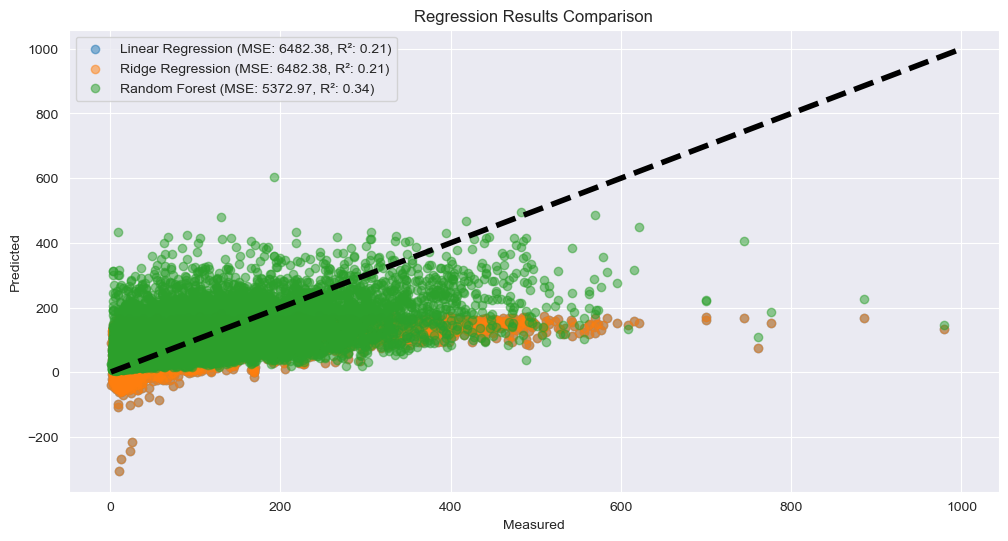

In [32]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, lr_pred, alpha=0.5, label=f'Linear Regression (MSE: {lr_mse:.2f}, R²: {lr_r2:.2f})')
plt.scatter(y_test, ridge_pred, alpha=0.5, label=f'Ridge Regression (MSE: {ridge_mse:.2f}, R²: {ridge_r2:.2f})')
plt.scatter(y_test, rf_pred, alpha=0.5, label=f'Random Forest (MSE: {rf_mse:.2f}, R²: {rf_r2:.2f})')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Regression Results Comparison')
plt.legend()
plt.show()
